In [85]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [86]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [87]:
# Importing dataset

df = pd.read_csv(r'train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [88]:
# checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [89]:
# shape of df
df.shape

(1460, 81)

In [90]:
# summary checking
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## NULL VALUES HANDLING,DUPLICATES HANDLING,DROPPING UNNECESSARY COLUMNS, CREATING DERIVED COLUMNS

In [91]:
# checking null values for columns
((df.select_dtypes(include='object').isnull().sum()[df.isnull().sum() > 0])/(df.shape[0]))*100

Alley           93.767123
MasVnrType       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [92]:
# Replace NA with None in the following columns below :
# all the below columns mentioned have some values as NA which are actually None,i.e for example in case of Alley ,NA represents No alley 
columns = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical']
for col in columns:
    df[col]=df[col].fillna('None')

In [93]:
# it is better to remove categorical columns who have one specific value in more than 85 %
# if a column has a specific value for almost 85 percent of all values then column does not provide much info for model so removing them
categorical_columns_more_than_85 = []
categorical_columns = df.select_dtypes(include=['object'])
for column in categorical_columns:
    if ((df[column].value_counts().max())/(df.shape[0]))*100 >= 85:
        categorical_columns_more_than_85.append(column)

df.drop(categorical_columns_more_than_85, axis = 1, inplace = True)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


In [94]:
# checking null values for categorical columns again
((df.select_dtypes(include='object').isnull().sum()[df.isnull().sum() > 0])/(df.shape[0]))*100

Series([], dtype: float64)

In [95]:
# checking null values of numeric columns

((df.select_dtypes(include=['int64','float']).isnull().sum()[df.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0])/df.shape[0])*100

LotFrontage    17.739726
MasVnrArea      0.547945
GarageYrBlt     5.547945
dtype: float64

In [96]:
# Handling GarageYrBlt column
# let us see the values less than 2000
df[df['GarageYrBlt'] < 2000].shape[0]

977

In [97]:
# let us see the values greater than or equal to 2000
df.shape[0] - df[df['GarageYrBlt'] < 2000].shape[0]

483

In [98]:
# Create a new column OldOrNewGarage whose values are obtained by converting the GarageYrBlt in such a way that if the value is less than 2000 => assign it as 0 (old garage) , and if it is greater than or equal to 2000 => assign it as 1 (new garage)  
# since old garages are more(977 records have garageyrblt as less than 2000) from the above we impute the null values in GarageYrBlt with 0 (old garage)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)
df['OldOrNewGarage'] = df['GarageYrBlt'].apply(lambda x : 0 if x<2000 else 1)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,2,2008,Normal,208500,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,0,None,0,2,2006,Abnorml,140000,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,None,0,12,2008,Normal,250000,1


In [99]:
# Imputing the null values with median values for LotFrontage and MasVnrArea columns ,as median is not sensitive to outliers

df['LotFrontage'] = df['LotFrontage'].replace(np.nan, df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan, df['MasVnrArea'].median())
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,2,2008,Normal,208500,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,0,None,0,2,2006,Abnorml,140000,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,None,0,12,2008,Normal,250000,1


In [100]:
# creating a new column AgeAtTimeOfSelling which tells us the info about age of building at the time os selling

def functionForAgeCalculation(row):
    if(row['YearBuilt'] != row['YearRemodAdd']):
        return row['YrSold'] - row['YearRemodAdd']
    else:
        return row['YrSold'] - row['YearBuilt']
       
df['AgeAtTimeOfSelling'] = df.apply(functionForAgeCalculation, axis=1)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,OldOrNewGarage,AgeAtTimeOfSelling
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,2008,Normal,208500,1,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,2007,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,2006,Abnorml,140000,0,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,2008,Normal,250000,1,8


In [101]:
# creating RemodollingStatus column which tells info whether house has been remodelled based on difference between the year on which it was built and the year on which it was remodelled
def functionForCheckingRemodellingStatus(currentrow):
    if(currentrow['YearBuilt'] < currentrow['YearRemodAdd']):
        return 1
    elif(currentrow['YearBuilt'] == currentrow['YearRemodAdd']):
        return 0
    else:
        return 2

df['RemodellingStatus'] = df.apply(functionForCheckingRemodellingStatus, axis=1)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,OldOrNewGarage,AgeAtTimeOfSelling,RemodellingStatus
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,None,0,2,2008,Normal,208500,1,5,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,None,0,5,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,None,0,9,2008,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,None,0,2,2006,Abnorml,140000,0,36,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,None,0,12,2008,Normal,250000,1,8,0


In [102]:
# now since we derived new features 'RemodellingStatus','AgeAtTimeOfSelling','OldOrNewGarage' , we will delete all those features which are used to derive these new features
df.drop(['YearBuilt', 'GarageYrBlt', 'YrSold', 'YearRemodAdd'],
                 axis = 1, inplace = True)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleCondition,SalePrice,OldOrNewGarage,AgeAtTimeOfSelling,RemodellingStatus
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,Normal,208500,1,5,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,Abnorml,140000,0,36,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,Normal,250000,1,8,0


In [103]:
# removing all numeric columns who have one specific value appearing in them for more than 85 percent of the times
# this is done because there is not much info the columns will provide if more than 85 percent of the values in column have same value
numeric_columns_more_than_85 = []
numeric_columns = df.select_dtypes(include=['int64','float64'])
for column in numeric_columns:
    if ((df[column].value_counts().max())/(df.shape[0]))*100 >= 85:
        numeric_columns_more_than_85.append(column)

df.drop(numeric_columns_more_than_85, axis = 1, inplace = True)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,SaleCondition,SalePrice,OldOrNewGarage,AgeAtTimeOfSelling,RemodellingStatus
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,548,0,61,None,2,Normal,208500,1,5,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,460,298,0,None,5,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,608,0,42,None,9,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,642,0,35,None,2,Abnorml,140000,0,36,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,836,192,84,None,12,Normal,250000,1,8,0


In [104]:
# checking for null values in each column once again
((df.isnull().sum()[df.isnull().sum() > 0])/(df.shape[0]))*100

Series([], dtype: float64)

In [105]:
# therefore from the above there are no null values
# now removing duplicates if exists
print('shape of data frame before removing duplicates',df.shape)
df.drop_duplicates(inplace = True)
print('shape of data frame after removing duplicates',df.shape)

shape of data frame before removing duplicates (1460, 50)
shape of data frame after removing duplicates (1460, 50)


In [106]:
# there is no change of shape after dropping duplicates, there fore no duplicates are present intially

In [107]:
# dropping id column since it is not that useful for our anlaysis
df.drop(['Id'],axis = 1,inplace = True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,SaleCondition,SalePrice,OldOrNewGarage,AgeAtTimeOfSelling,RemodellingStatus
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,548,0,61,None,2,Normal,208500,1,5,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,460,298,0,None,5,Normal,181500,0,31,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,608,0,42,None,9,Normal,223500,1,6,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,642,0,35,None,2,Abnorml,140000,0,36,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,836,192,84,None,12,Normal,250000,1,8,0


# OUTLIER TREATMENT

In [108]:
# checking summary pf numeric columns
df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,OldOrNewGarage,AgeAtTimeOfSelling,RemodellingStatus
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,1162.626712,...,0.613014,1.767123,472.980137,94.244521,46.660274,6.321918,180921.195890,0.275342,22.950000,0.476712
std,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,386.587738,...,0.644666,0.747315,213.804841,125.338794,66.256028,2.703626,79442.502883,0.446840,20.640653,0.499629
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,-1.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,0.000000,1.000000,334.500000,0.000000,0.000000,5.000000,129975.000000,0.000000,4.000000,0.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,...,1.000000,2.000000,480.000000,0.000000,25.000000,6.000000,163000.000000,0.000000,14.000000,0.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,...,1.000000,2.000000,576.000000,168.000000,68.000000,8.000000,214000.000000,1.000000,41.000000,1.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,1680.000000,...,1.000000,3.000000,757.100000,262.000000,130.000000,10.000000,278000.000000,1.000000,56.000000,1.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,1831.250000,...,2.000000,3.000000,850.100000,335.000000,175.050000,11.000000,326100.000000,1.000000,58.000000,1.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,2219.460000,...,2.000000,3.000000,1002.790000,505.460000,285.820000,12.000000,442567.010000,1.000000,60.000000,1.000000


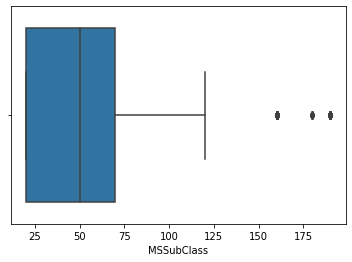

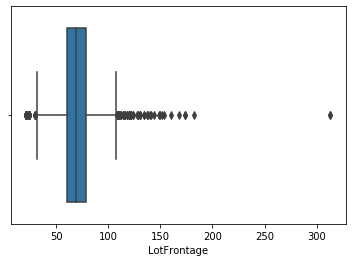

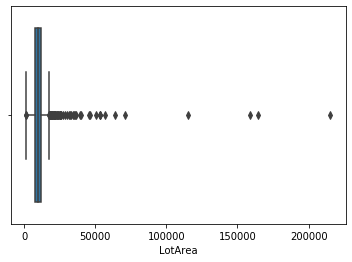

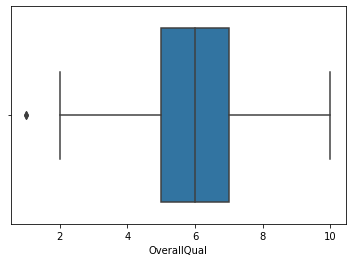

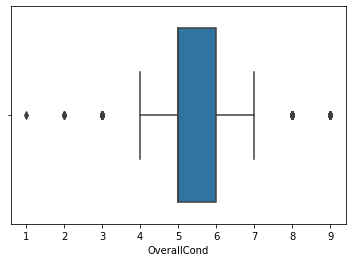

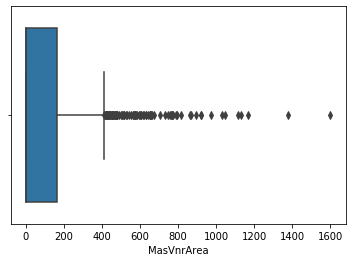

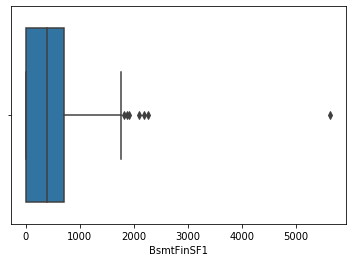

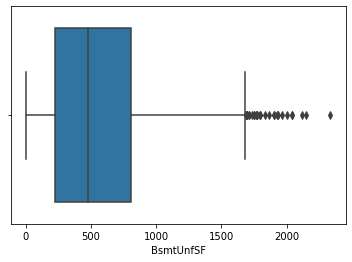

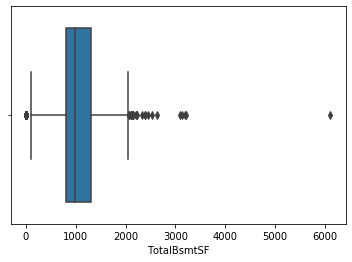

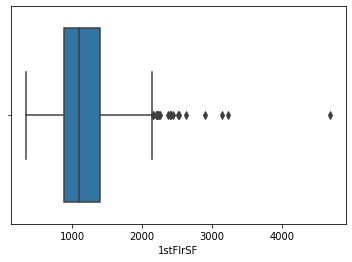

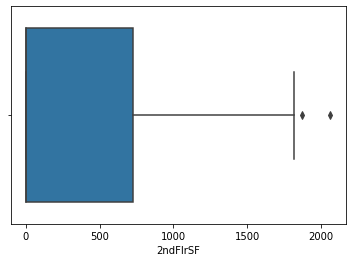

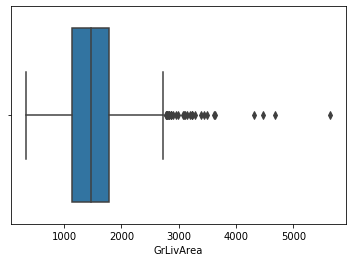

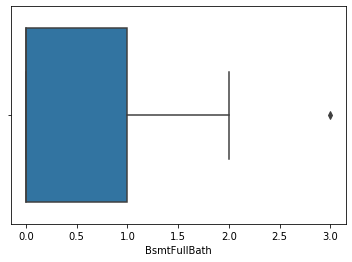

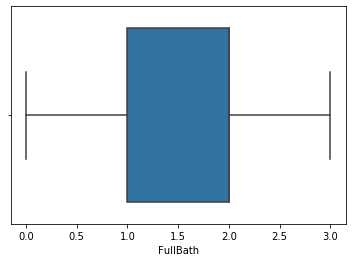

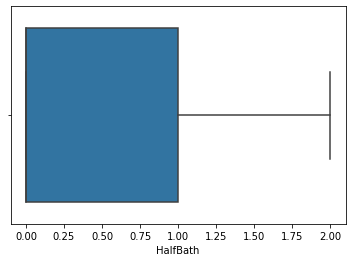

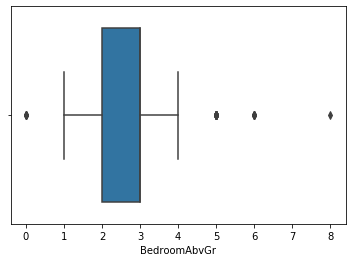

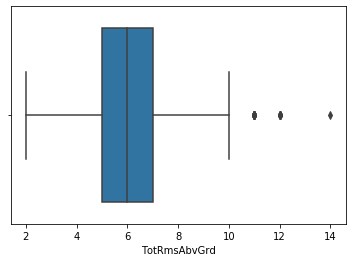

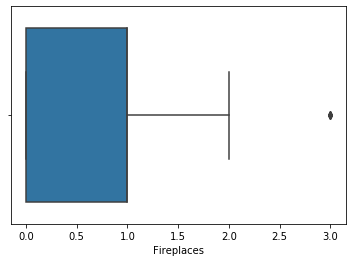

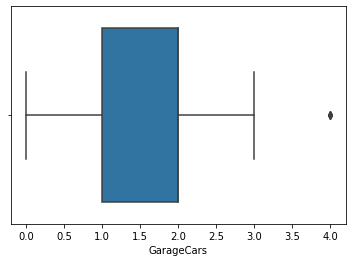

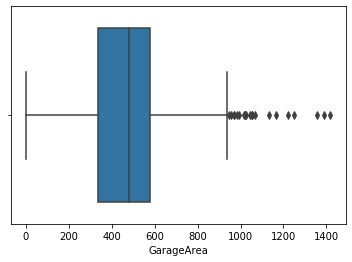

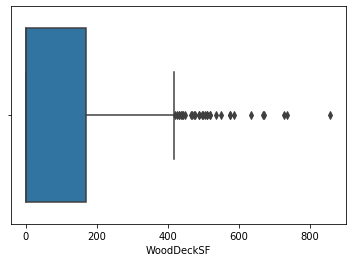

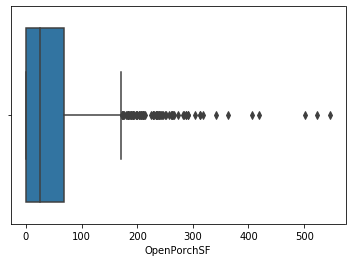

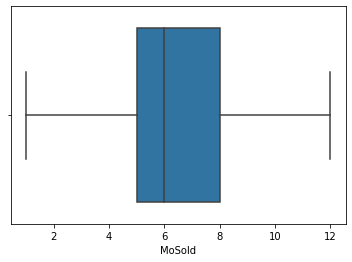

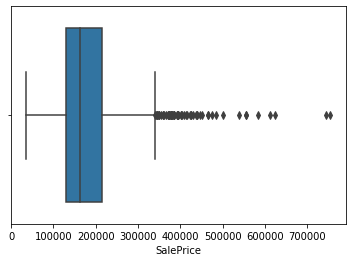

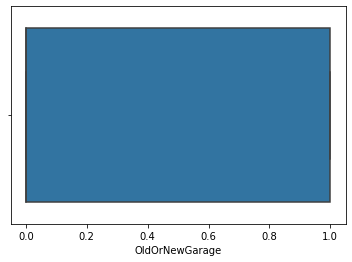

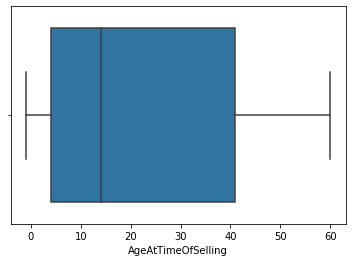

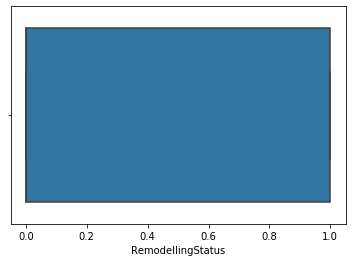

In [109]:
# checking how each numeic column is distributed
def plot_distribution_of_numeric_columns(df,col):
    sns.boxplot(df[col])
    plt.show()

numeric_columns = df.select_dtypes(include=['int64','float']).columns
for column in numeric_columns:
    plot_distribution_of_numeric_columns(df,column)
    

In [110]:
# as we can see from above we can see that there are outliers from above box plots
# dropping outliers....
numeric_columns = df.select_dtypes(include=['int64','float']).columns
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.99)
    IQR = Q3 - Q1
    df =  df[(df[column] >= (Q1-(1.5*IQR))) & (df[column] <= (Q3+(1.5*IQR)))] 
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,SaleCondition,SalePrice,OldOrNewGarage,AgeAtTimeOfSelling,RemodellingStatus
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,548,0,61,None,2,Normal,208500,1,5,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,460,298,0,None,5,Normal,181500,0,31,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,608,0,42,None,9,Normal,223500,1,6,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,642,0,35,None,2,Abnorml,140000,0,36,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,836,192,84,None,12,Normal,250000,1,8,0


In [111]:
# checking shape of the data frame
df.shape

(1453, 49)

# EDA

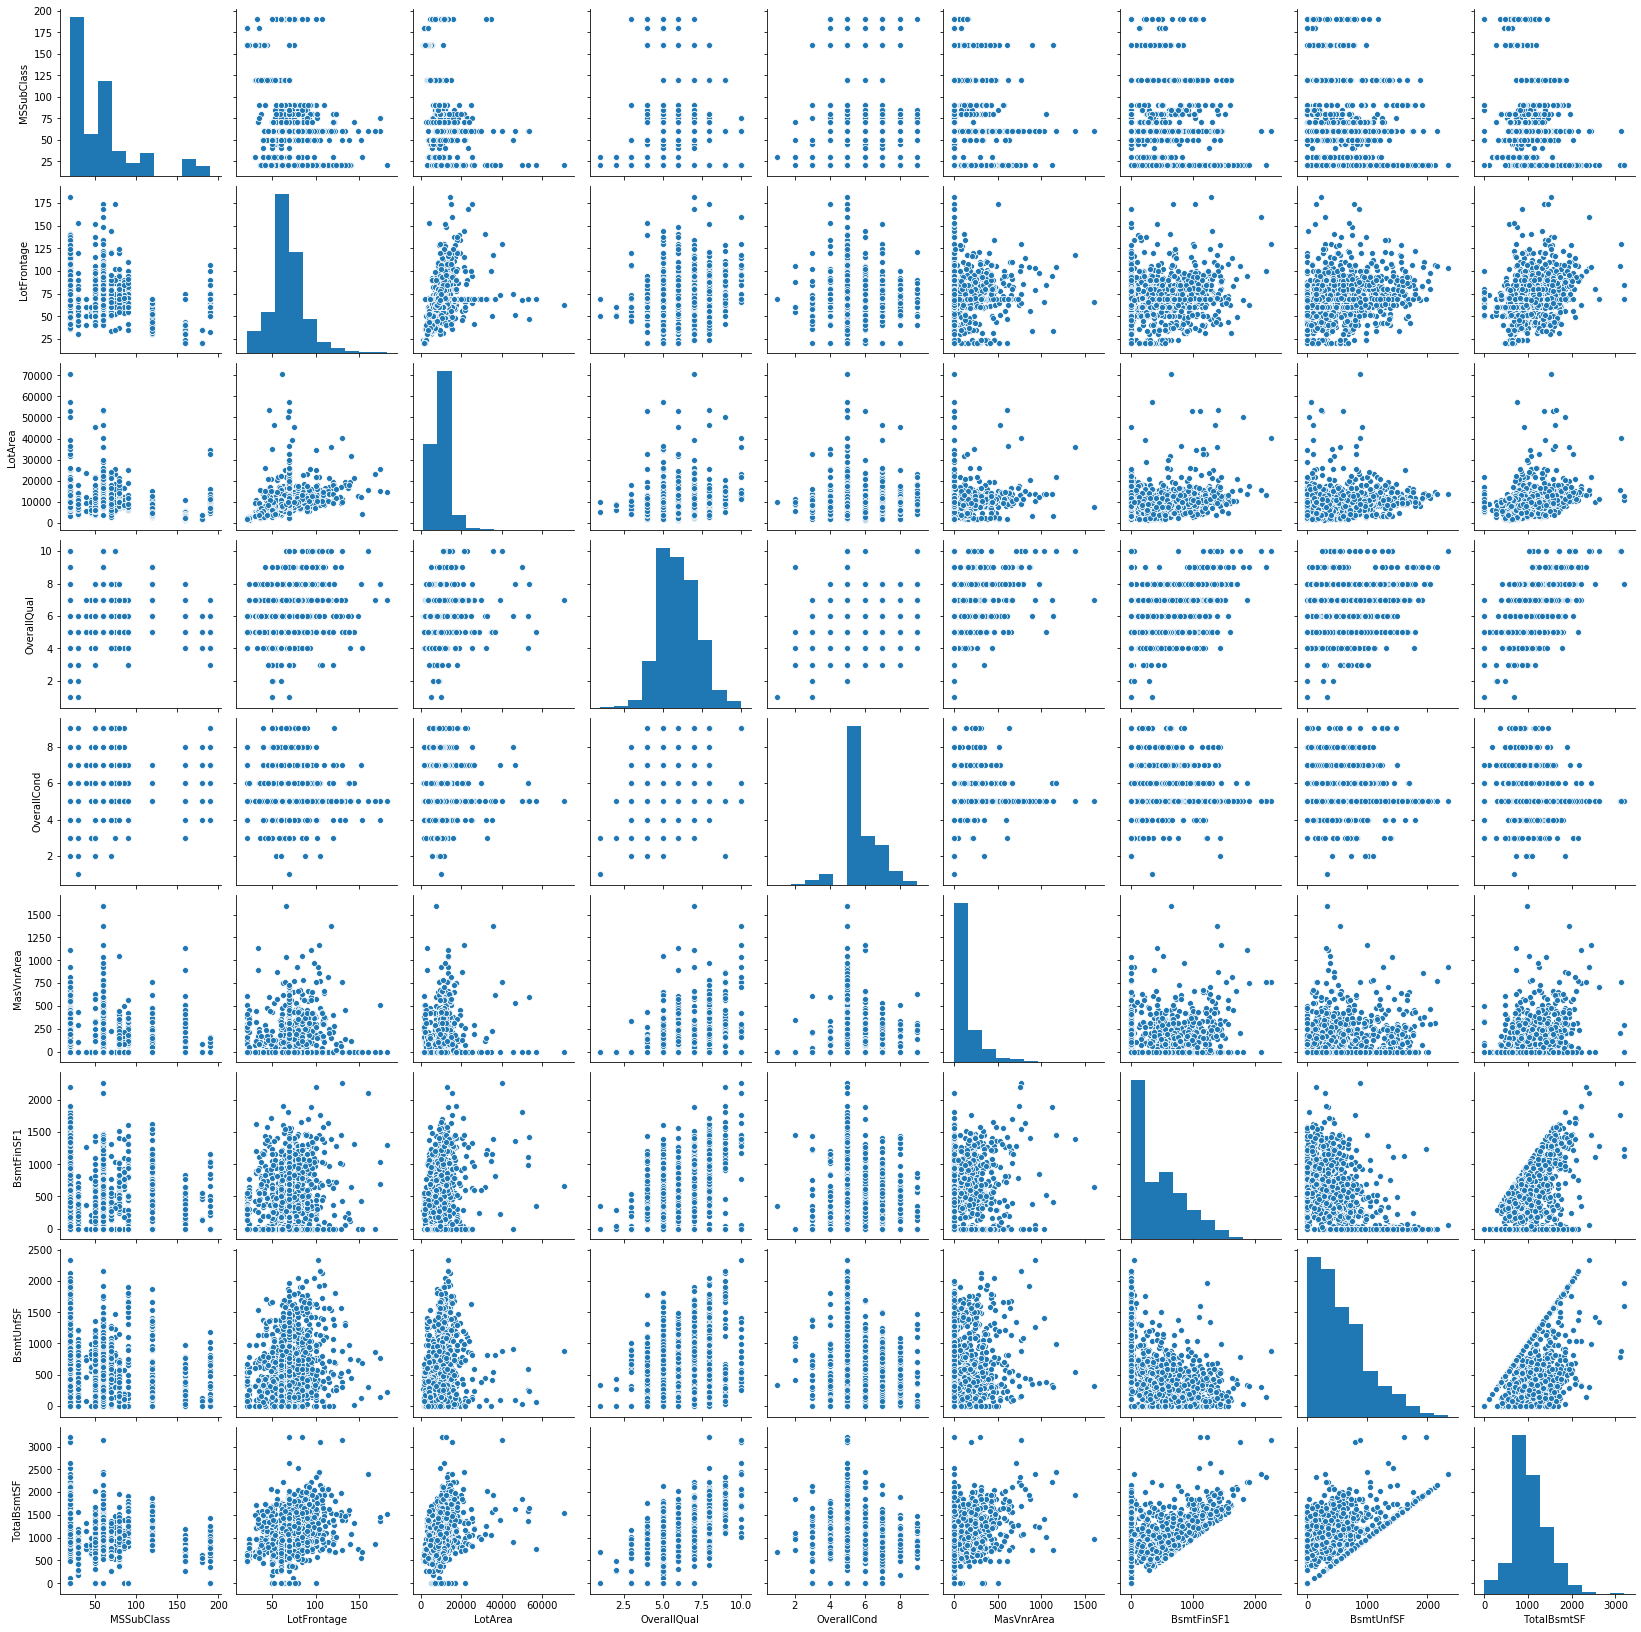

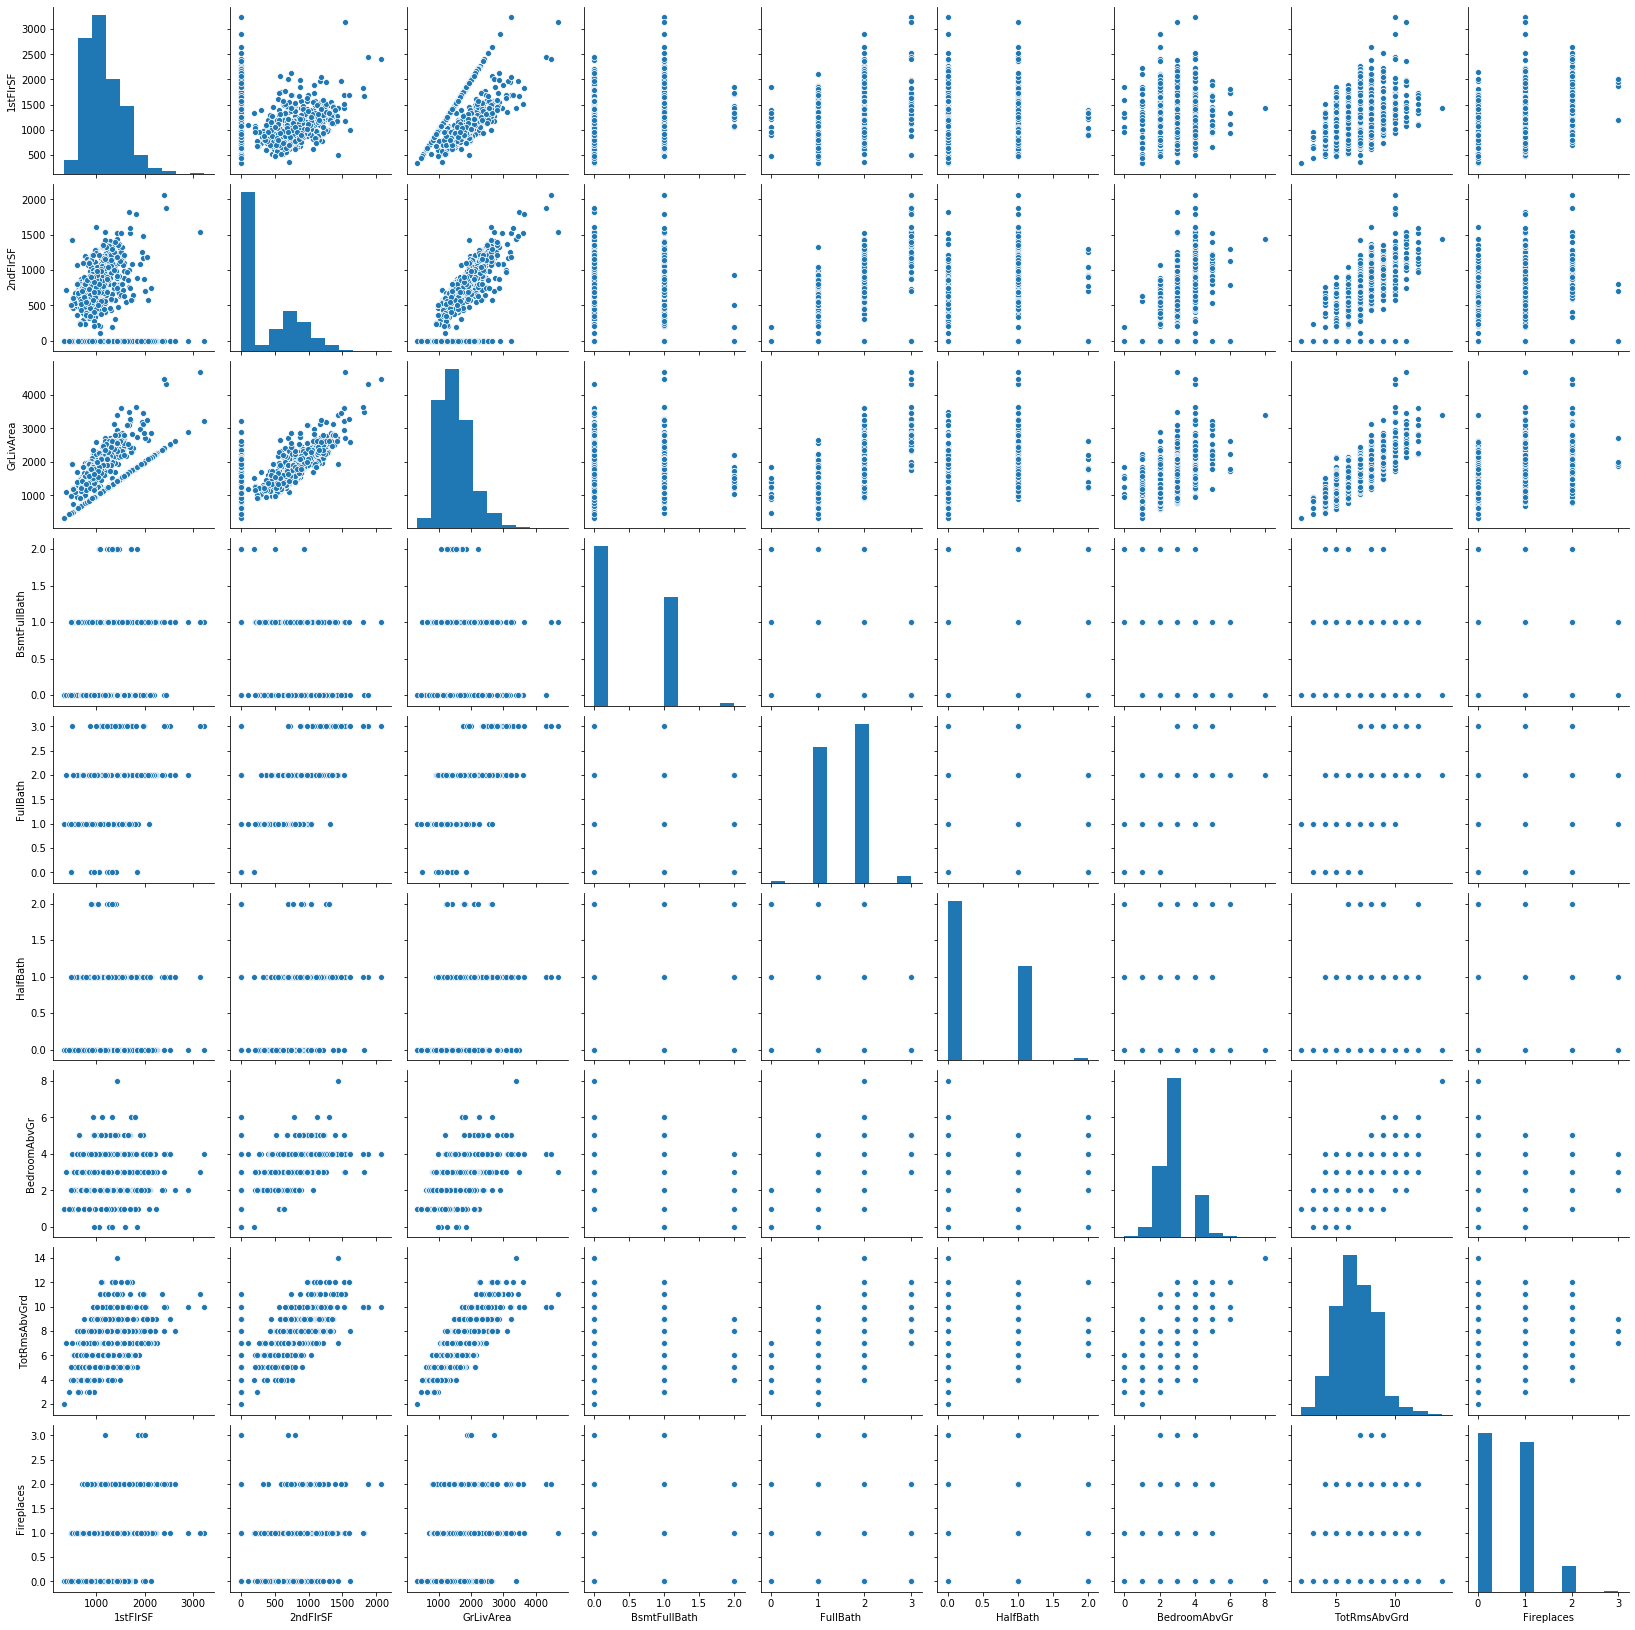

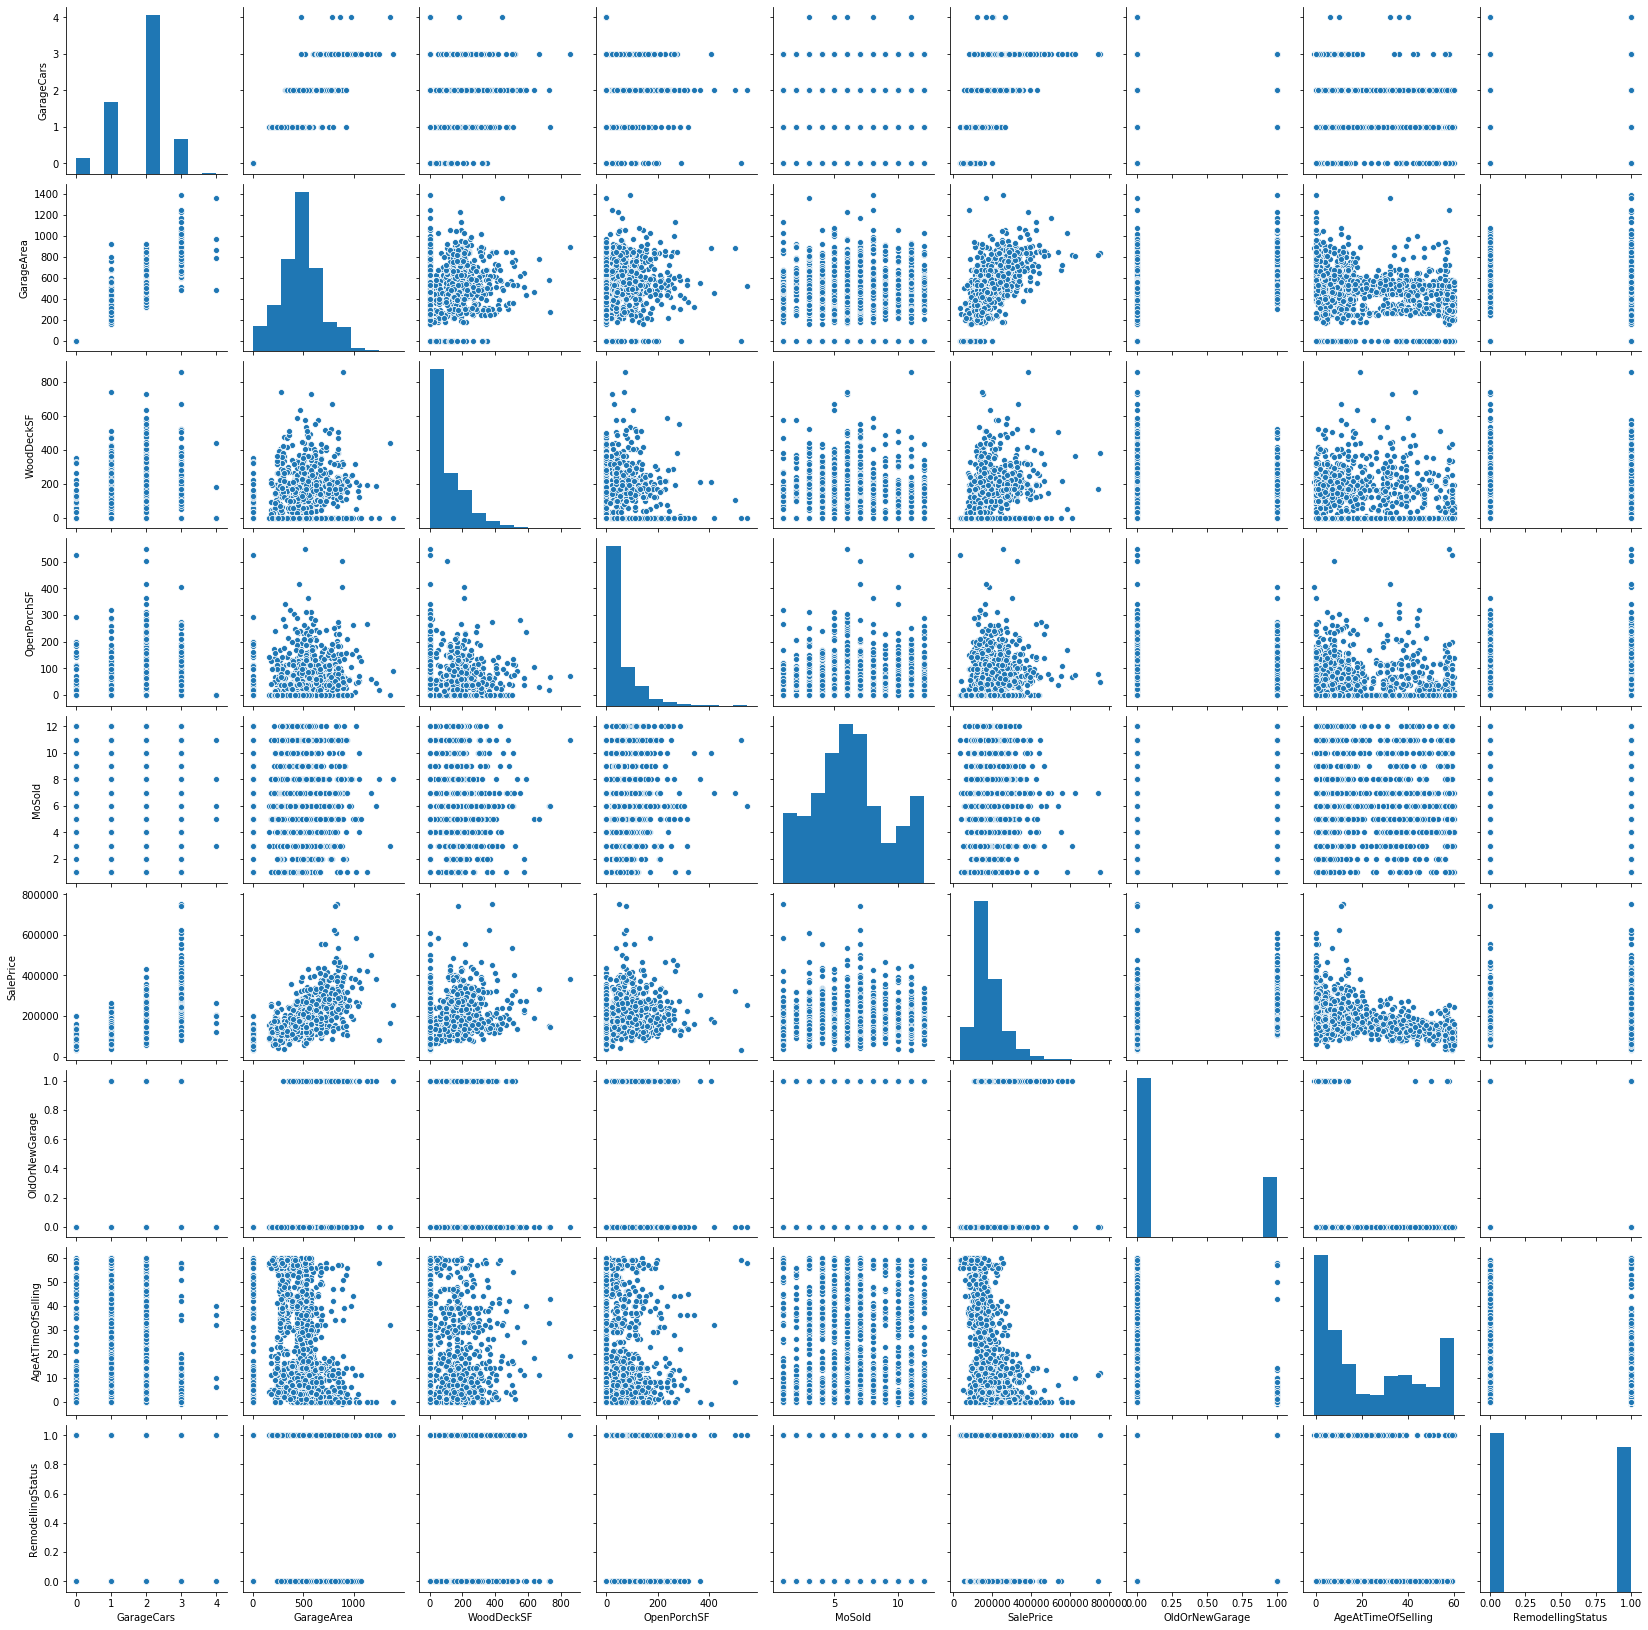

In [112]:
# checking how each numeric variable relates to another
numeric_columns_part1 = numeric_columns[:9]
numeric_columns_part2 = numeric_columns[9:18]
numeric_columns_part3 = numeric_columns[18:]

sns.pairplot(df[numeric_columns_part1])
plt.show()
sns.pairplot(df[numeric_columns_part2])
plt.show()
sns.pairplot(df[numeric_columns_part3])
plt.show()

Insights from pairplots:
- Unfinished square feet of basement area(BsmtUnfSF) and Total square feet of basement area(TotalBsmtSF) has positive relationship between them
- First Floor square feet (1stFlrSF),Above Ground living area square feet (GrLivArea) have a positive relationship between them.
- Second Floor square feet (2ndFlrSF),Above Ground living area square feet (GrLivArea) have a positive relationship between them.
- Total rooms above grade (TotRmsAbvGrd) and Second Floor Square feet (2ndFlrSF) have a positive relationship between them.
- Total rooms above grade (TotRmsAbvGrd) and Above Ground living area square feet (GrLivArea) have a positive relationship between them.

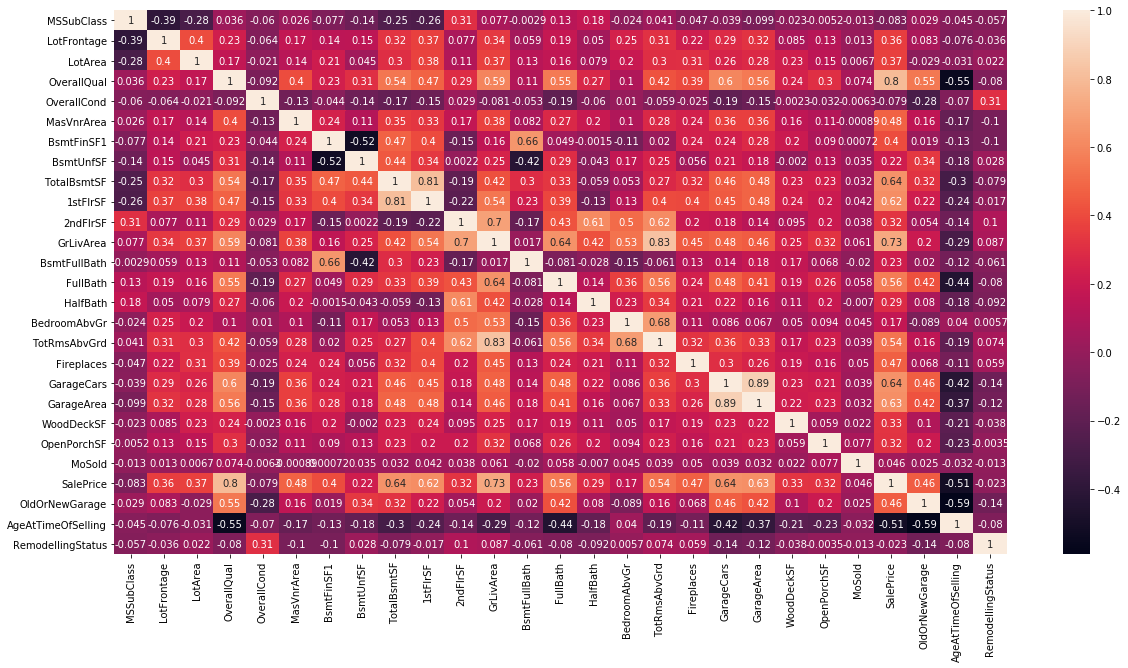

In [114]:
# Heatmap for correlation matrix between numeric columns
plt.figure(figsize = (20,10))
sns.heatmap(df[numeric_columns].corr(),annot = True)
plt.show()

Insights from correlation matrix
- GarageArea and GarageCars have high positive correlation of magnitude 0.88
- GrLivArea and TotRmsAbvGrd also have high positive correlation of magnitude 0.83

In [115]:
# Because of above high correlations dropping Garage Cars and TotRmsAbvGrd
df.drop(['GarageArea','TotRmsAbvGrd'], axis = 1, inplace = True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageCars,WoodDeckSF,OpenPorchSF,Fence,MoSold,SaleCondition,SalePrice,OldOrNewGarage,AgeAtTimeOfSelling,RemodellingStatus
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,2,0,61,None,2,Normal,208500,1,5,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,2,298,0,None,5,Normal,181500,0,31,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,2,0,42,None,9,Normal,223500,1,6,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,3,0,35,None,2,Abnorml,140000,0,36,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,3,192,84,None,12,Normal,250000,1,8,0


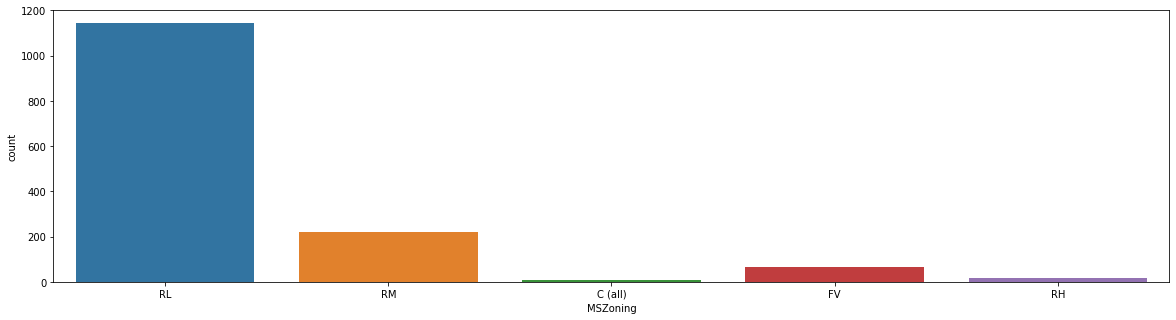

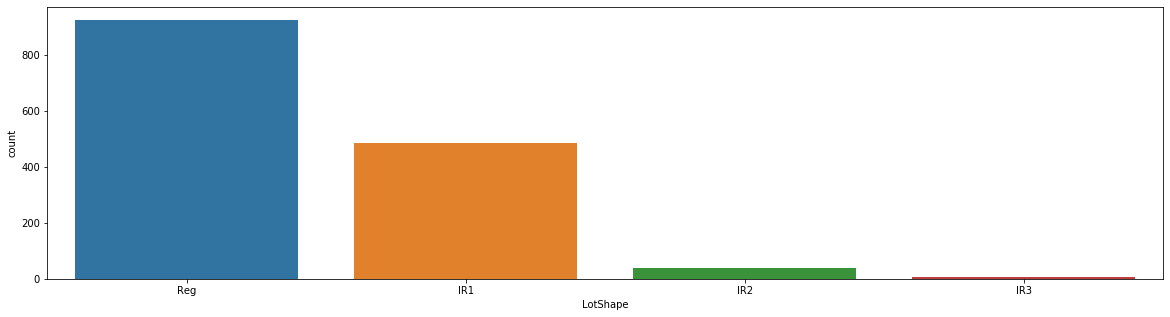

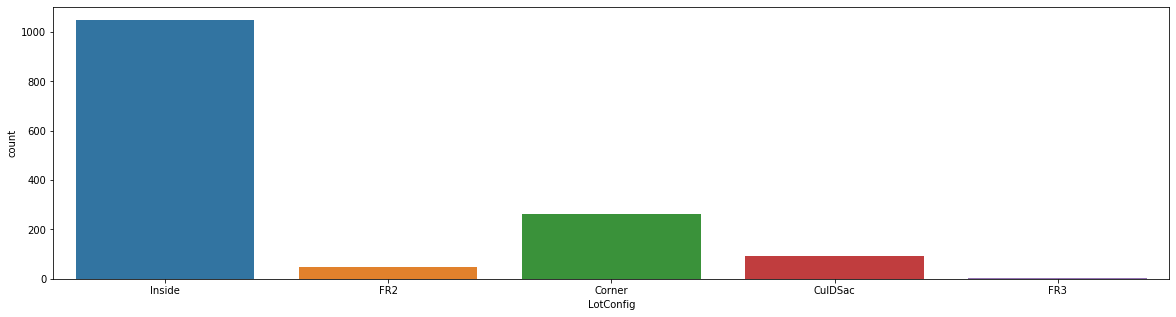

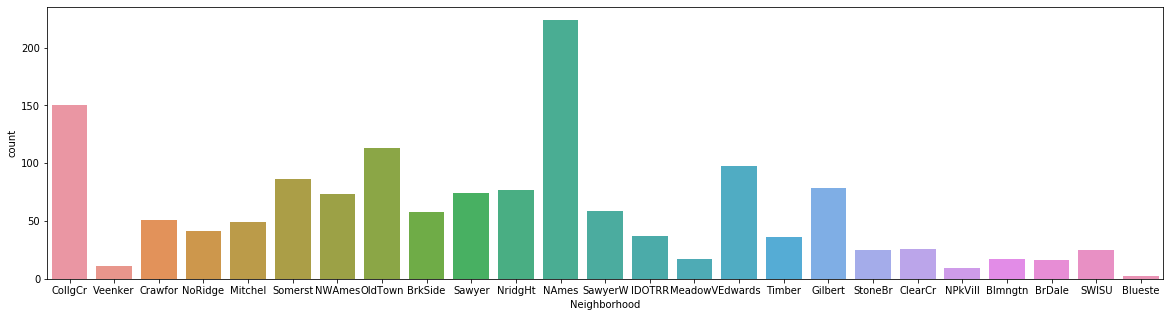

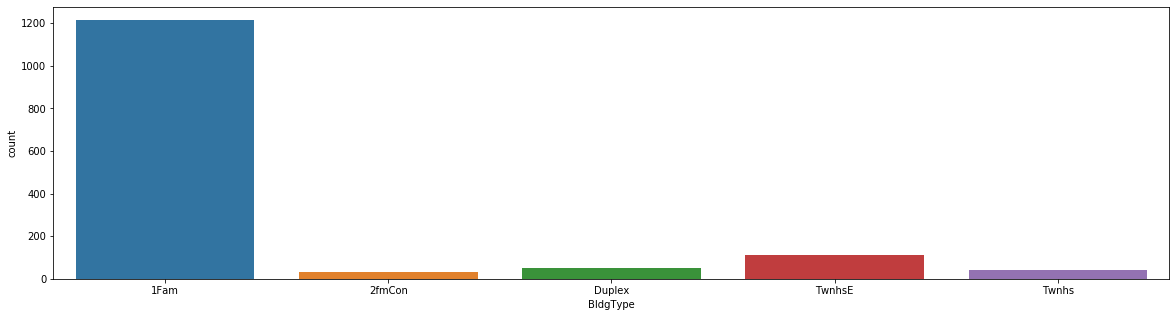

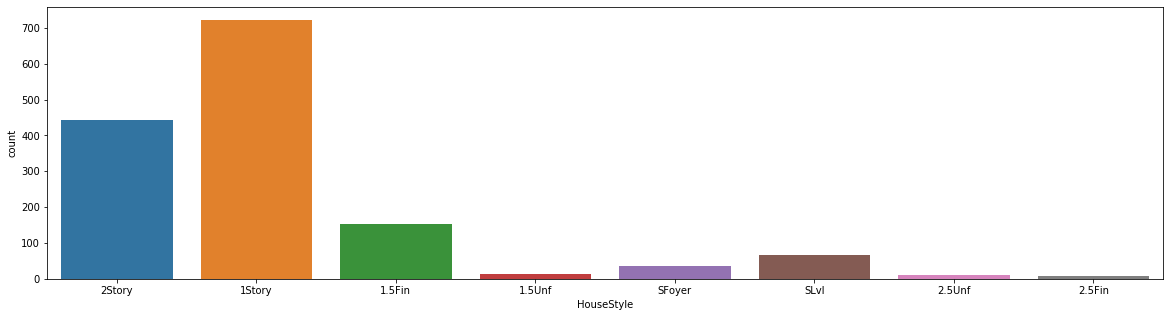

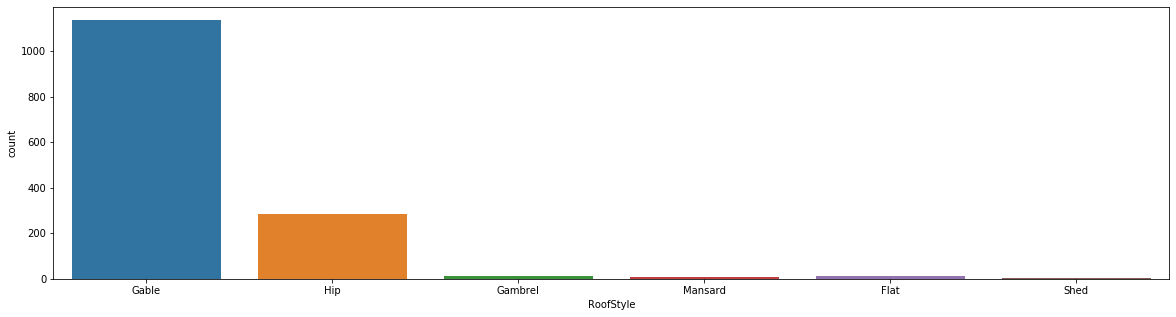

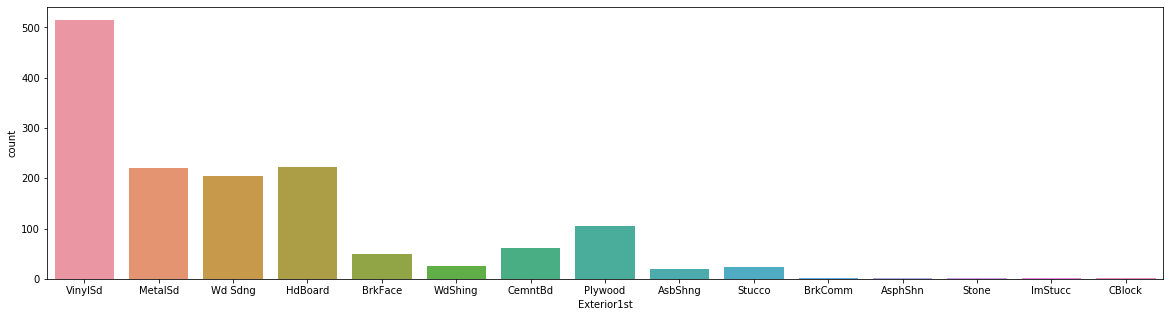

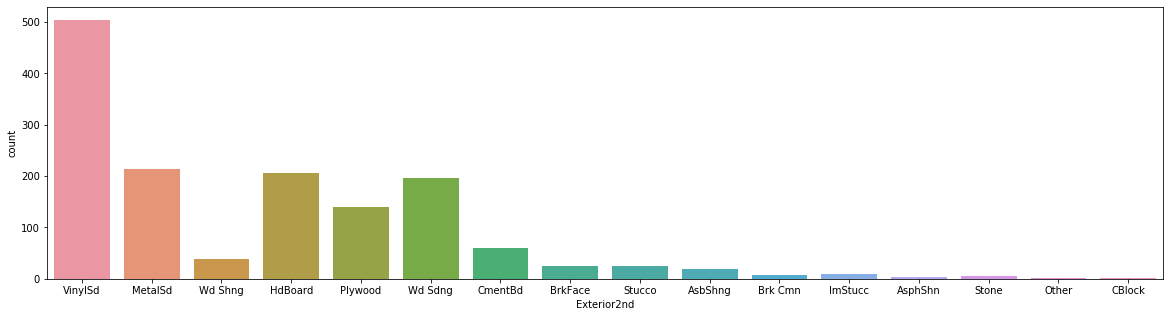

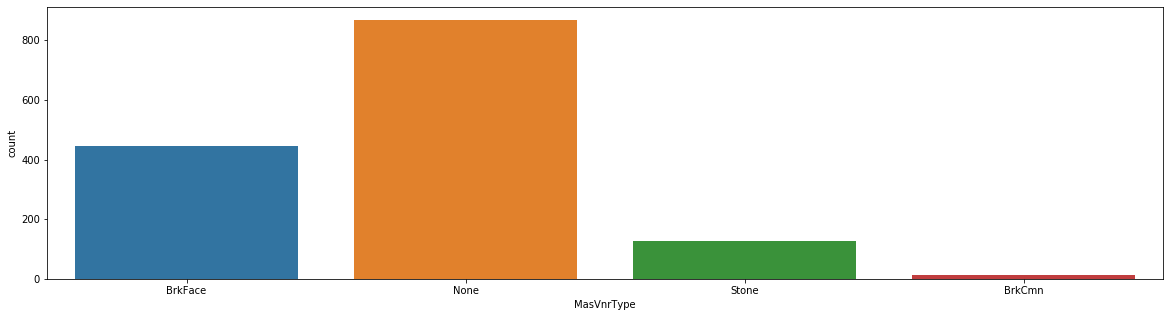

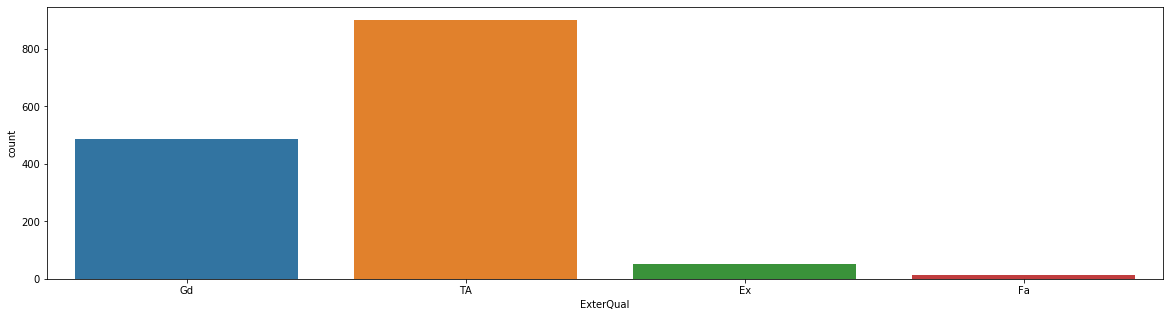

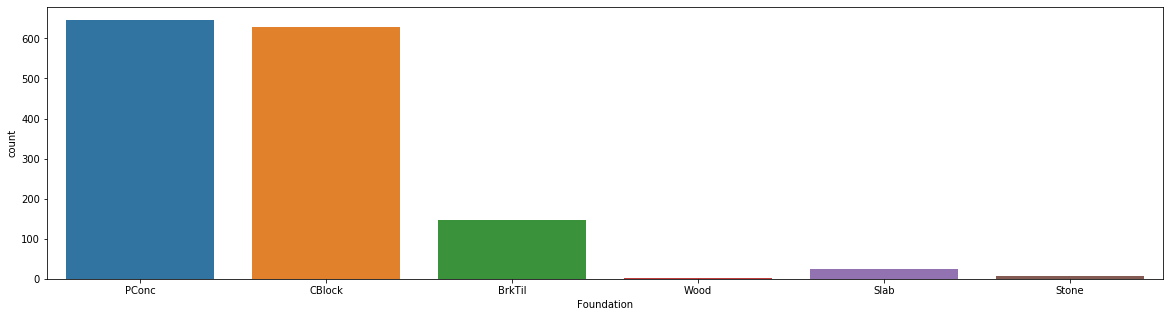

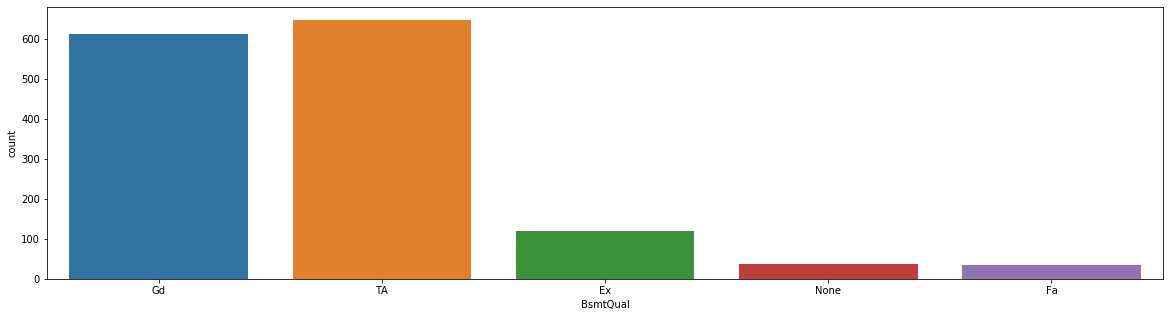

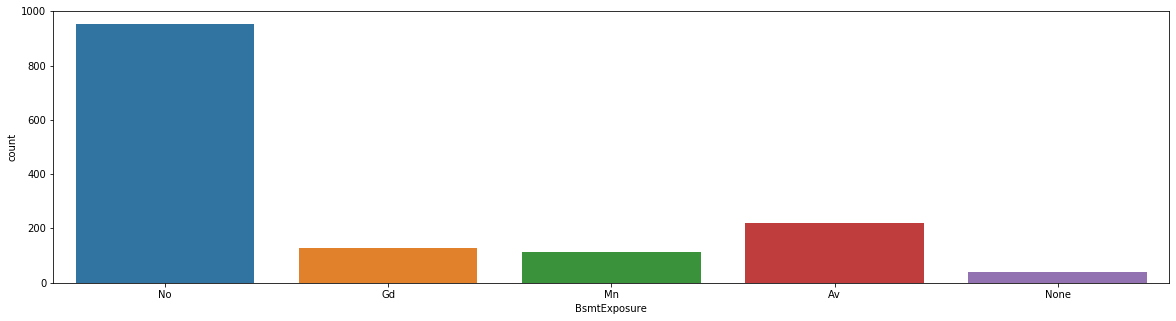

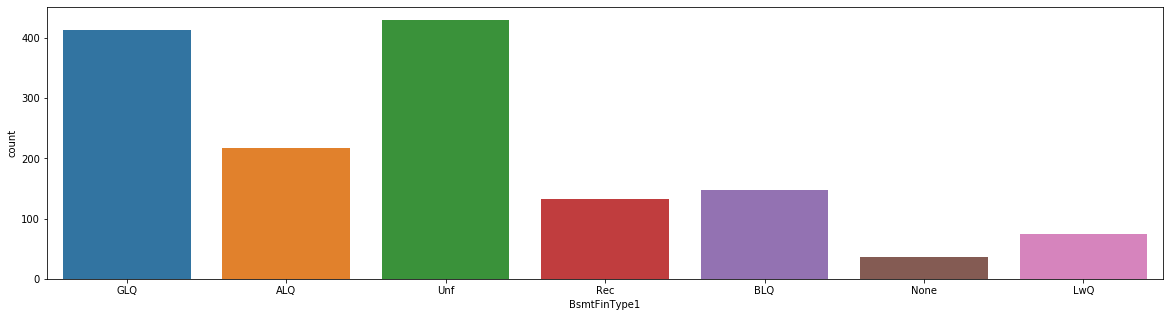

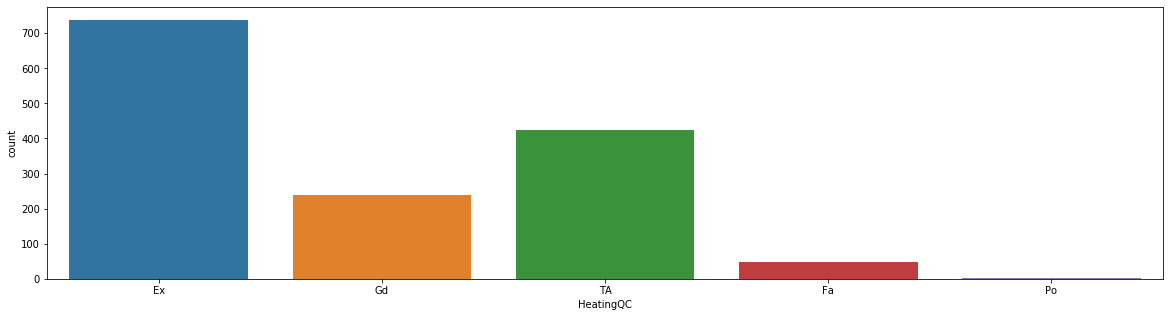

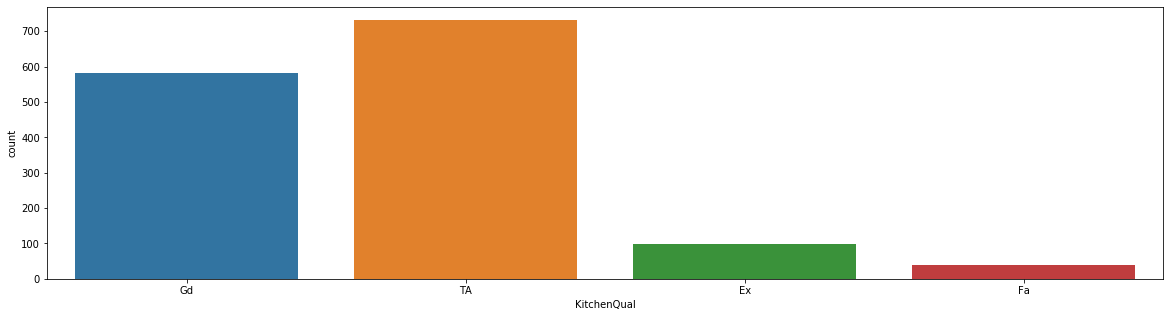

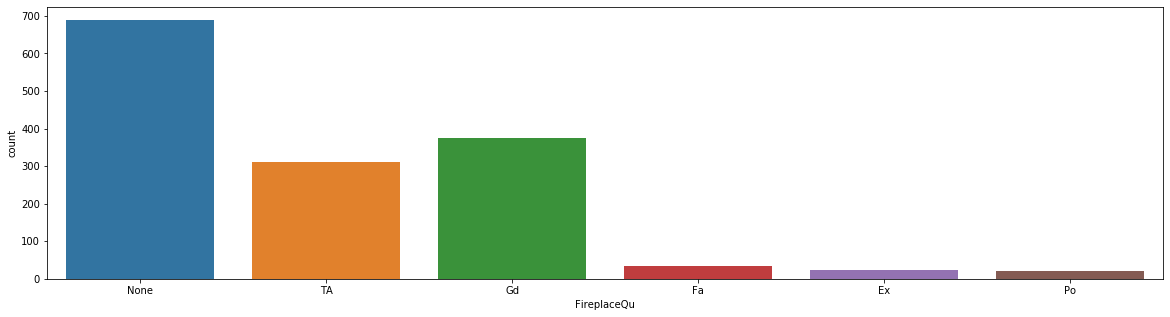

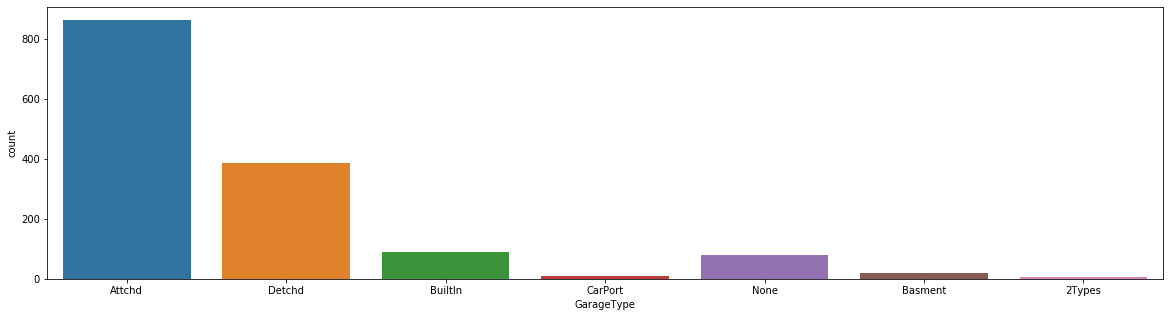

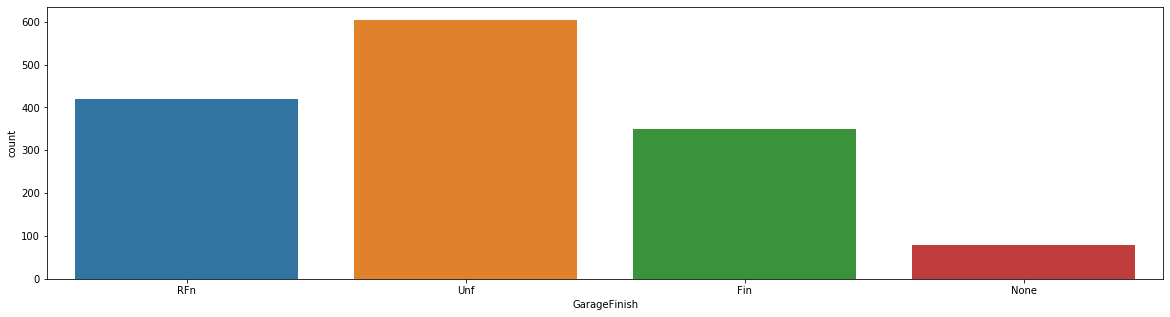

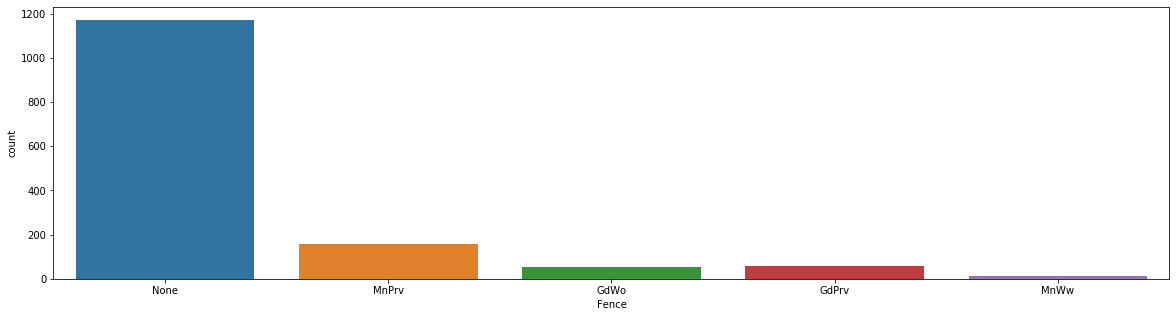

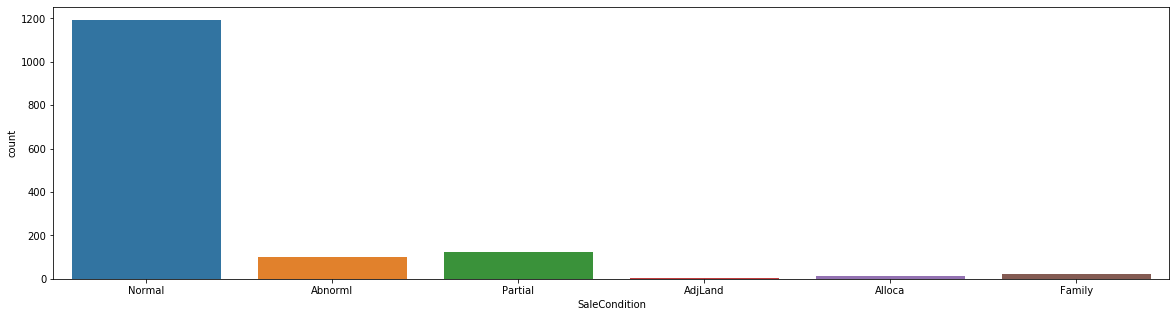

In [116]:
# Understanding distributions of Categorical columns
categorical_columns = list(df.select_dtypes(include='object').columns)
for col in categorical_columns:
    plt.figure(figsize = (20,5))
    sns.countplot(df[col])
    plt.show()

Some of the Insights:
- Most of the shapes of property in data are Regular
- Most of the House styles in data composes of 1 story
- Most of the RoofStyles belongs to Gable Category
- Most of the Quality of exterior material is Average

## COLUMN TRANSFORMATION IN A CORRECT FORMAT AND DUMMY CREATION

In [117]:
# Some of the columns are ordered columns written in the form of strings instead of numbers,therefore converting them in correct format
# For values which cannot be ordered, we have categorised them into 0 and 1
# For values which can be ordered, we have given an ordered sequence value

df['LotShape'] = df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
df['HeatingQC'] = df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['KitchenQual'] = df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})


df['GarageFinish'] = df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
df['BldgType'] = df['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
df['HouseStyle'] = df['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
df['Fence'] = df['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
df['LotConfig'] = df['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
df['MasVnrType'] = df['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
df['SaleCondition'] = df['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
df['ExterQual'] = df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
df['BsmtQual'] = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['BsmtExposure'] = df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})


df['FireplaceQu'] = df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageCars,WoodDeckSF,OpenPorchSF,Fence,MoSold,SaleCondition,SalePrice,OldOrNewGarage,AgeAtTimeOfSelling,RemodellingStatus
0,60,RL,65.0,8450,3,5,CollgCr,1,4,7,...,2,0,61,0,2,1,208500,1,5,0
1,20,RL,80.0,9600,3,2,Veenker,1,1,6,...,2,298,0,0,5,1,181500,0,31,0
2,60,RL,68.0,11250,2,5,CollgCr,1,4,7,...,2,0,42,0,9,1,223500,1,6,1
3,70,RL,60.0,9550,2,4,Crawfor,1,4,7,...,3,0,35,0,2,0,140000,0,36,1
4,60,RL,84.0,14260,2,2,NoRidge,1,4,8,...,3,192,84,0,12,1,250000,1,8,0


In [119]:
# Creating dummies


dummies_created = pd.get_dummies(df['MSZoning'], prefix='MSZoning', drop_first = True)
df = pd.concat([df,dummies_created], axis = 1)


dummies_created = pd.get_dummies(df['Neighborhood'], prefix='Neighborhood', drop_first = True)
df = pd.concat([df,dummies_created], axis = 1)


dummies_created = pd.get_dummies(df['RoofStyle'], prefix='RoofStyle', drop_first = True)
df = pd.concat([df, dummies_created], axis = 1)


dummies_created = pd.get_dummies(df['Exterior1st'], prefix='Exterior1st', drop_first = True)
df = pd.concat([df,dummies_created], axis = 1)


dummies_created = pd.get_dummies(df['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
df = pd.concat([df, dummies_created], axis = 1)


dummies_created = pd.get_dummies(df['Foundation'], prefix='Foundation', drop_first = True)
df = pd.concat([df,dummies_created], axis = 1)


dummies_created = pd.get_dummies(df['GarageType'], prefix='GarageType', drop_first = True)
df = pd.concat([df, dummies_created], axis = 1)


# dropping the pre existing columns as we now have created dummies

df= df.drop(['MSZoning', 'Exterior2nd', 'Neighborhood', 'RoofStyle', 'Exterior1st','Foundation', 
                                'GarageType'], axis=1)

df.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,MasVnrType,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,3,5,1,4,7,5,1,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,3,2,1,1,6,8,0,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,2,5,1,4,7,5,1,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,2,4,1,4,7,5,0,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,2,2,1,4,8,5,1,...,1,0,0,0,1,0,0,0,0,0


# TRAIN TEST SPLIT , SCALING

In [120]:
# Splitting into train test data
df_train,df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [121]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

numerical = df_train.select_dtypes(include=['int64','float']).columns

df_train[numerical] = scaler.fit_transform(df_train[numerical])
df_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,MasVnrType,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
853,0.352941,0.298137,0.153253,0.666667,0.75,0.0,1.000000,0.500,0.571429,1.0,...,0,0,0,0,1,0,0,0,0,0
25,0.000000,0.552795,0.184068,1.000000,0.75,0.0,0.000000,0.750,0.428571,1.0,...,1,0,0,0,1,0,0,0,0,0
88,0.176471,0.521739,0.100932,0.666667,0.75,0.0,0.285714,0.125,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
1214,0.382353,0.298137,0.125974,0.666667,1.00,0.0,0.857143,0.375,0.428571,0.0,...,0,0,0,0,1,0,0,0,0,0
1166,0.000000,0.267081,0.129871,0.666667,0.75,0.0,0.000000,0.750,0.428571,1.0,...,1,0,0,0,1,0,0,0,0,0


In [122]:
# splitting train data into dependent and independent variables
# y_train consists of dependent variable and x_train consists of independent variables
y_train = df_train['SalePrice']
X_train = df_train.drop('SalePrice',axis = 1)


Since there are around 113 features, we will use RFE first to select best 50 features from 113 features and proceed with further analysis

# RFE

In [123]:
# initialising the Linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# rUNNING rfe
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('LotShape', False, 63),
 ('LotConfig', False, 58),
 ('BldgType', True, 1),
 ('HouseStyle', False, 39),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrType', False, 27),
 ('MasVnrArea', True, 1),
 ('ExterQual', True, 1),
 ('BsmtQual', True, 1),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 50),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', False, 45),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 59),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 36),
 ('FullBath', False, 61),
 ('HalfBath', False, 18),
 ('BedroomAbvGr', True, 1),
 ('KitchenQual', True, 1),
 ('Fireplaces', True, 1),
 ('FireplaceQu', True, 1),
 ('GarageFinish', True, 1),
 ('GarageCars', True, 1),
 ('WoodDeckSF', False, 4),
 ('OpenPorchSF', False, 40),
 ('Fence', False, 47),
 ('MoSold', False, 6),
 ('SaleCondition', False, 44),
 ('OldOrNewGarage', False, 2),
 ('AgeAtTimeOfSe

In [124]:
# top 50 columns
top_50_columns = X_train.columns[rfe.support_]
top_50_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'BldgType', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BedroomAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu',
       'GarageFinish', 'GarageCars', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV',
       'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'RoofStyle_Shed', 'Exterior1st_BrkComm', 'Exterior1st_Stone',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_ImStucc',
       'Exterior2nd_Stone', 'Foundation_Slab', 'Foundation_Wood',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_

In [125]:
X_train_rfe = X_train[top_50_columns]
X_train_rfe.head()
X_train = X_train_rfe[X_train_rfe.columns]

# MODEL BUILDING

# Ridge

In [126]:
# list of alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

# folds in Cross validation : 5
# performing grid search to select optimal alpha
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [127]:
# displaying results obtained from grid search
ridge_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002623,0.000777,0.001041,0.000157,0.0001,{'alpha': 0.0001},-0.033405,-0.022757,-0.023900,-0.025628,...,-0.026531,0.003726,19,-0.022422,-0.024805,-0.025308,-0.025214,-0.024121,-0.024374,0.001062
1,0.002749,0.000367,0.000950,0.000058,0.001,{'alpha': 0.001},-0.033383,-0.022757,-0.023899,-0.025627,...,-0.026526,0.003718,18,-0.022419,-0.024805,-0.025308,-0.025213,-0.024122,-0.024373,0.001063
2,0.003216,0.000389,0.001242,0.000488,0.01,{'alpha': 0.01},-0.033213,-0.022754,-0.023887,-0.025623,...,-0.026486,0.003658,16,-0.022395,-0.024805,-0.025306,-0.025211,-0.024123,-0.024368,0.001071
3,0.002696,0.000366,0.000996,0.000001,0.05,{'alpha': 0.05},-0.032886,-0.022744,-0.023849,-0.025600,...,-0.026395,0.003545,14,-0.022357,-0.024805,-0.025300,-0.025208,-0.024126,-0.024359,0.001083
4,0.003028,0.000162,0.000933,0.000138,0.1,{'alpha': 0.1},-0.032745,-0.022734,-0.023816,-0.025568,...,-0.026340,0.003500,13,-0.022352,-0.024806,-0.025293,-0.025205,-0.024131,-0.024357,0.001083
5,0.002342,0.000559,0.001006,0.000643,0.2,{'alpha': 0.2},-0.032632,-0.022730,-0.023767,-0.025509,...,-0.026277,0.003466,11,-0.022347,-0.024808,-0.025279,-0.025203,-0.024136,-0.024355,0.001082
6,0.002511,0.000429,0.000977,0.000632,0.3,{'alpha': 0.3},-0.032575,-0.022723,-0.023737,-0.025458,...,-0.026234,0.003451,10,-0.022339,-0.024811,-0.025265,-0.025201,-0.024139,-0.024351,0.001083
7,0.003527,0.000500,0.001399,0.000486,0.4,{'alpha': 0.4},-0.032541,-0.022712,-0.023710,-0.025418,...,-0.026200,0.003445,9,-0.022332,-0.024828,-0.025254,-0.025200,-0.024141,-0.024351,0.001085
8,0.002629,0.000501,0.001070,0.000114,0.5,{'alpha': 0.5},-0.032514,-0.022700,-0.023683,-0.025388,...,-0.026171,0.003442,8,-0.022327,-0.024850,-0.025248,-0.025201,-0.024145,-0.024354,0.001088
9,0.003020,0.000747,0.001337,0.000586,0.6,{'alpha': 0.6},-0.032492,-0.022686,-0.023657,-0.025362,...,-0.026145,0.003441,6,-0.022323,-0.024873,-0.025245,-0.025202,-0.024151,-0.024359,0.001091


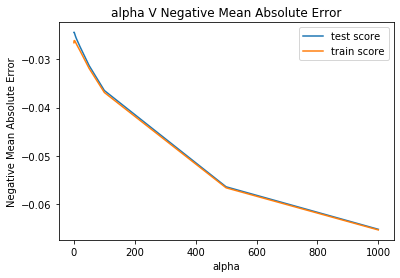

In [128]:
# plotting mean train and test score with alphas

plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("alpha V Negative Mean Absolute Error")
plt.legend(['test score','train score'], loc='upper right')
plt.show()

In [129]:
# best lambda

ridge_model_cv.best_estimator_

Ridge(alpha=2.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [130]:
# Printing the coefficients , for the best lambda
# creating ridge model for optimal lambda
alpha = 2.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.03625186  0.01739056  0.05293683 -0.01554456  0.10127402  0.03723395
  0.03442657  0.04834532  0.05095247  0.04021543  0.05948707  0.05830545
  0.10159042  0.09470317  0.10757667 -0.02802549  0.0361538   0.03327426
 -0.00816371  0.01629535  0.05481821  0.008691    0.01023822  0.01585992
  0.00822526  0.01181876  0.0253953   0.0325128   0.02188515  0.01900958
  0.05957267  0.06442787  0.03750926  0.08745807  0.02322983 -0.00784839
 -0.0177834  -0.01187131  0.00663502  0.01130862  0.02898355  0.00462975
  0.05456485 -0.01456684  0.01046995  0.00173646  0.01464742 -0.00183211
  0.00997008  0.03002711]


In [131]:
# storing the coefficients for optimal lambda in a data frame
df_ridge_info = pd.DataFrame({'Features':X_train.columns,'Coefficient':ridge.coef_})
df_ridge_info

,Features,Coefficient
0,MSSubClass,-0.036252
1,LotFrontage,0.017391
2,LotArea,0.052937
3,BldgType,-0.015545
4,OverallQual,0.101274
5,OverallCond,0.037234
6,MasVnrArea,0.034427
7,ExterQual,0.048345
8,BsmtQual,0.050952
9,BsmtExposure,0.040215


In [132]:
# Storing the above data frame in form of dictionary
features_coefficients_dict = dict(pd.Series(ridge.coef_, index = X_train.columns))
features_coefficients_dict

{'MSSubClass': -0.0362518611105571,
 'LotFrontage': 0.01739055626550239,
 'LotArea': 0.052936830901699414,
 'BldgType': -0.015544564380921168,
 'OverallQual': 0.10127402007108911,
 'OverallCond': 0.03723395491047405,
 'MasVnrArea': 0.0344265668292647,
 'ExterQual': 0.04834532226648166,
 'BsmtQual': 0.05095247150597857,
 'BsmtExposure': 0.04021543273263507,
 'BsmtFinSF1': 0.059487065648497275,
 'TotalBsmtSF': 0.058305452478183126,
 '1stFlrSF': 0.10159041842867937,
 '2ndFlrSF': 0.09470317159881031,
 'GrLivArea': 0.10757667274335986,
 'BedroomAbvGr': -0.02802549413873878,
 'KitchenQual': 0.03615380328675541,
 'Fireplaces': 0.03327426157768783,
 'FireplaceQu': -0.008163713896920192,
 'GarageFinish': 0.01629535401872309,
 'GarageCars': 0.05481820701598627,
 'MSZoning_FV': 0.008691002579279546,
 'MSZoning_RH': 0.01023821681368358,
 'MSZoning_RL': 0.01585992362087974,
 'MSZoning_RM': 0.008225258881787685,
 'Neighborhood_Blueste': 0.01181875706121218,
 'Neighborhood_BrDale': 0.0253952998522513

In [133]:
# finding out metrics to understand how good this model is performing

# selecting only the finalised columns and applying scaling to it
df_test[numerical] = scaler.transform(df_test[numerical])

y_test = df_test['SalePrice']
X_test = df_test.drop('SalePrice',axis = 1)
X_test = X_test[X_train.columns]




y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R squared for training set :",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R squared for test set :",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Residual squared Sum of training set :",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Residual squared Sum of test set :",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Root Mean squared error for training set :",mse_train_lr**0.5)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Root Mean squared error for test set :",mse_test_lr**0.5)
metric2.append(mse_test_lr**0.5)

R squared for training set : 0.8823140464687464
R squared for test set : 0.8647348790310738
Residual squared Sum of training set : 1.588838746096147
Residual squared Sum of test set : 0.5582383743630681
Root Mean squared error for training set : 0.03952568767685847
Root Mean squared error for test set : 0.035782163768447416


In [134]:
# Doing RFE again to minimize features to 16
X_train_final_ridge = X_train
lm = LinearRegression()
lm.fit(X_train_final_ridge, y_train)

# rUNNING rfe
rfe = RFE(lm, 16)            
rfe = rfe.fit(X_train_final_ridge, y_train)

list(zip(X_train_final_ridge.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 2),
 ('LotFrontage', False, 33),
 ('LotArea', True, 1),
 ('BldgType', False, 17),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 4),
 ('ExterQual', True, 1),
 ('BsmtQual', True, 1),
 ('BsmtExposure', False, 3),
 ('BsmtFinSF1', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', False, 20),
 ('BedroomAbvGr', True, 1),
 ('KitchenQual', False, 5),
 ('Fireplaces', False, 32),
 ('FireplaceQu', False, 34),
 ('GarageFinish', False, 31),
 ('GarageCars', True, 1),
 ('MSZoning_FV', False, 29),
 ('MSZoning_RH', False, 28),
 ('MSZoning_RL', False, 27),
 ('MSZoning_RM', False, 30),
 ('Neighborhood_Blueste', False, 10),
 ('Neighborhood_BrDale', False, 16),
 ('Neighborhood_Crawfor', False, 8),
 ('Neighborhood_MeadowV', False, 14),
 ('Neighborhood_NPkVill', False, 13),
 ('Neighborhood_NoRidge', True, 1),
 ('Neighborhood_NridgHt', True, 1),
 ('Neighborhood_Somerst', False, 9),
 ('Neighborhood_StoneBr', 

In [135]:
# storing the top 16 columns in a list
top_16_columns =X_train_final_ridge.columns[rfe.support_]
top_16_columns = list(top_16_columns)
top_16_columns

['LotArea',
 'OverallQual',
 'OverallCond',
 'ExterQual',
 'BsmtQual',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'BedroomAbvGr',
 'GarageCars',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'Foundation_Slab',
 'Foundation_Wood']

In [136]:
# creating a data frame for storing coefficients of top 16 features
df_top_16_features = pd.DataFrame({'Features' : top_16_columns})
df_top_16_features['Coefficients'] = df_top_16_features['Features'].apply(lambda x : features_coefficients_dict[x])
df_top_16_features.sort_values('Coefficients',ascending = False)

,Features,Coefficients
7,1stFlrSF,0.101590
1,OverallQual,0.101274
8,2ndFlrSF,0.094703
13,Neighborhood_StoneBr,0.087458
12,Neighborhood_NridgHt,0.064428
11,Neighborhood_NoRidge,0.059573
5,BsmtFinSF1,0.059487
6,TotalBsmtSF,0.058305
10,GarageCars,0.054818
14,Foundation_Slab,0.054565


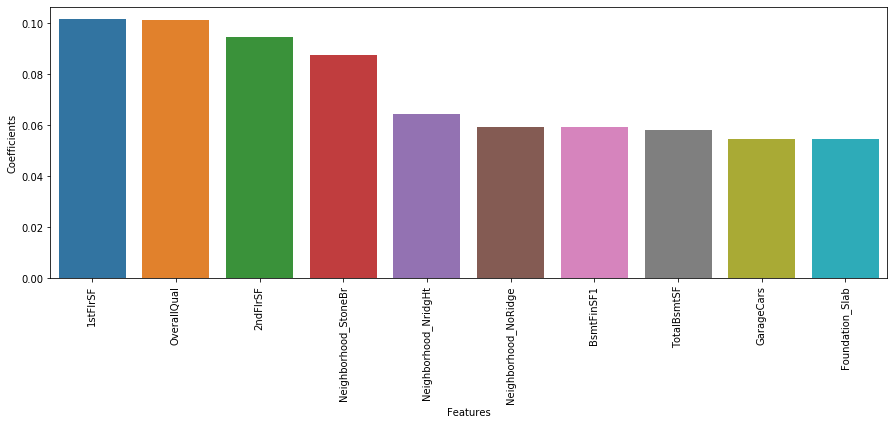

In [137]:
# Displaying top 10 features contributing to predictions of price of house
df_top_16_features = df_top_16_features.sort_values('Coefficients',ascending = False)
df_top_10_features = df_top_16_features.iloc[:10,]
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
sns.barplot(x = df_top_10_features['Features'],y = df_top_10_features['Coefficients'])

# Lasso

In [138]:
# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,0.0006,0.0007,0.0008,0.0009,0.001, 0.002, 0.003, 0.004, 0.005, 
                    0.006,0.007,0.008,0.009,0.01]}


lasso = Lasso()

lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
                                   0.009, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [139]:
# checking results obtained from grid search
lasso_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.023326,0.006191,0.002245,0.000354,0.0001,{'alpha': 0.0001},-0.032852,-0.023025,-0.023859,-0.025320,...,-0.026315,0.003482,1,-0.022691,-0.025364,-0.025573,-0.025475,-0.024478,-0.024716,0.001085
1,0.023360,0.006905,0.001984,0.000023,0.0002,{'alpha': 0.0002},-0.033012,-0.022985,-0.024225,-0.025426,...,-0.026481,0.003497,2,-0.023225,-0.025795,-0.026032,-0.025984,-0.025068,-0.025221,0.001056
2,0.015801,0.009117,0.001767,0.000392,0.0003,{'alpha': 0.0003},-0.033816,-0.023122,-0.024454,-0.025508,...,-0.026745,0.003739,3,-0.023723,-0.026316,-0.026399,-0.026350,-0.025452,-0.025648,0.001025
3,0.009800,0.001675,0.001758,0.000416,0.0004,{'alpha': 0.0004},-0.034592,-0.023474,-0.024690,-0.025496,...,-0.027075,0.003941,4,-0.024214,-0.026674,-0.026831,-0.026701,-0.025789,-0.026042,0.000986
4,0.007917,0.001133,0.001877,0.000440,0.0005,{'alpha': 0.0005},-0.035119,-0.023656,-0.024833,-0.025413,...,-0.027273,0.004100,5,-0.024531,-0.026884,-0.027121,-0.027001,-0.026001,-0.026308,0.000972
5,0.007095,0.000565,0.001453,0.000482,0.0006,{'alpha': 0.0006},-0.035562,-0.023911,-0.024890,-0.025312,...,-0.027457,0.004230,6,-0.024820,-0.027118,-0.027316,-0.027103,-0.026233,-0.026518,0.000927
6,0.006861,0.000520,0.001161,0.000223,0.0007,{'alpha': 0.0007},-0.035835,-0.024026,-0.024972,-0.025289,...,-0.027603,0.004311,7,-0.024986,-0.027303,-0.027446,-0.027237,-0.026425,-0.026679,0.000919
7,0.007191,0.000814,0.001966,0.000085,0.0008,{'alpha': 0.0008},-0.036160,-0.024227,-0.025078,-0.025328,...,-0.027809,0.004390,8,-0.025175,-0.027552,-0.027641,-0.027396,-0.026689,-0.026891,0.000921
8,0.006546,0.000463,0.001543,0.000397,0.0009,{'alpha': 0.0009},-0.036358,-0.024401,-0.025218,-0.025408,...,-0.028003,0.004419,9,-0.025318,-0.027848,-0.027872,-0.027638,-0.027003,-0.027136,0.000962
9,0.006483,0.000418,0.001753,0.000386,0.001,{'alpha': 0.001},-0.036416,-0.024659,-0.025302,-0.025559,...,-0.028173,0.004381,10,-0.025439,-0.028205,-0.028063,-0.027943,-0.027233,-0.027377,0.001025


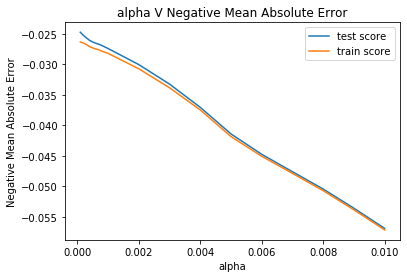

In [140]:
# plotting mean train and test score with alphas
lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('float64')

plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("alpha V Negative Mean Absolute Error")
plt.legend(['test score','train score'], loc='upper right')
plt.show()

In [141]:
# best lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [142]:
# Printing the coefficients , for the best lambda
# creating model for optimal lambda
alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)

[-0.04338915  0.00626834  0.05086324 -0.00669511  0.1119457   0.03688613
  0.02803406  0.04472219  0.05074596  0.04115112  0.06259815  0.04598772
  0.08290127  0.07532081  0.16404277 -0.02638025  0.03315499  0.02521085
 -0.00363048  0.01343479  0.05075482  0.          0.          0.00806729
 -0.          0.          0.01404341  0.0285124   0.01171865  0.00838203
  0.06029831  0.06464284  0.03689964  0.08972584  0.01686036 -0.
 -0.         -0.          0.          0.00668259  0.02007203  0.
  0.0498898  -0.          0.00108932 -0.00307458  0.00335739 -0.
  0.          0.01692709]


In [143]:
# storing the coefficients in a data frame
df_lasso_info = pd.DataFrame({'Features':X_train.columns,'Coefficient':lasso.coef_})
df_lasso_info = df_lasso_info[df_lasso_info['Coefficient'] != 0]
df_lasso_info

,Features,Coefficient
0,MSSubClass,-0.043389
1,LotFrontage,0.006268
2,LotArea,0.050863
3,BldgType,-0.006695
4,OverallQual,0.111946
5,OverallCond,0.036886
6,MasVnrArea,0.028034
7,ExterQual,0.044722
8,BsmtQual,0.050746
9,BsmtExposure,0.041151


In [144]:
# Storing the above data frame in form of dictionary

features_coefficients_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
features_coefficients_dict

{'MSSubClass': -0.043389149561495456,
 'LotFrontage': 0.006268336280698009,
 'LotArea': 0.050863237459314724,
 'BldgType': -0.006695105063061498,
 'OverallQual': 0.11194570443858223,
 'OverallCond': 0.03688612601765659,
 'MasVnrArea': 0.028034063455917666,
 'ExterQual': 0.044722189734606704,
 'BsmtQual': 0.050745961566636494,
 'BsmtExposure': 0.04115111653022651,
 'BsmtFinSF1': 0.0625981545125891,
 'TotalBsmtSF': 0.045987724876346434,
 '1stFlrSF': 0.08290127051919526,
 '2ndFlrSF': 0.07532080612706075,
 'GrLivArea': 0.16404276599536813,
 'BedroomAbvGr': -0.02638025393484308,
 'KitchenQual': 0.03315498575196083,
 'Fireplaces': 0.025210851237909743,
 'FireplaceQu': -0.0036304818453120604,
 'GarageFinish': 0.01343478871023048,
 'GarageCars': 0.050754815229469494,
 'MSZoning_FV': 0.0,
 'MSZoning_RH': 0.0,
 'MSZoning_RL': 0.008067294824608828,
 'MSZoning_RM': -0.0,
 'Neighborhood_Blueste': 0.0,
 'Neighborhood_BrDale': 0.014043409685386216,
 'Neighborhood_Crawfor': 0.02851239656229253,
 'Neig

In [145]:
# checking other metrics

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R squared for training set :",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R squared for test set :",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Residual squared Sum of training set :",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Residual squared Sum of test set :",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(" Root Mean squared error for training set :",mse_train_lr**0.5)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Root Mean squared error for test set :",mse_test_lr**0.5)
metric3.append(mse_test_lr**0.5)

R squared for training set : 0.8807621267341074
R squared for test set : 0.8637173030954985
Residual squared Sum of training set : 1.6097906960208341
Residual squared Sum of test set : 0.5624379043823187
 Root Mean squared error for training set : 0.03978544591935352
Root Mean squared error for test set : 0.035916503080581606


In [146]:
# Doing RFE again to minimize features to 16
X_train_final_lasso = X_train
lm = LinearRegression()
lm.fit(X_train_final_lasso, y_train)

# rUNNING rfe
rfe = RFE(lm, 16)            
rfe = rfe.fit(X_train_final_lasso, y_train)

list(zip(X_train_final_lasso.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 2),
 ('LotFrontage', False, 33),
 ('LotArea', True, 1),
 ('BldgType', False, 17),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 4),
 ('ExterQual', True, 1),
 ('BsmtQual', True, 1),
 ('BsmtExposure', False, 3),
 ('BsmtFinSF1', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', False, 20),
 ('BedroomAbvGr', True, 1),
 ('KitchenQual', False, 5),
 ('Fireplaces', False, 32),
 ('FireplaceQu', False, 34),
 ('GarageFinish', False, 31),
 ('GarageCars', True, 1),
 ('MSZoning_FV', False, 29),
 ('MSZoning_RH', False, 28),
 ('MSZoning_RL', False, 27),
 ('MSZoning_RM', False, 30),
 ('Neighborhood_Blueste', False, 10),
 ('Neighborhood_BrDale', False, 16),
 ('Neighborhood_Crawfor', False, 8),
 ('Neighborhood_MeadowV', False, 14),
 ('Neighborhood_NPkVill', False, 13),
 ('Neighborhood_NoRidge', True, 1),
 ('Neighborhood_NridgHt', True, 1),
 ('Neighborhood_Somerst', False, 9),
 ('Neighborhood_StoneBr', 

In [147]:
# top 16 columns
top_16_columns = X_train_final_lasso.columns[rfe.support_]
top_16_columns = list(top_16_columns)
top_16_columns


['LotArea',
 'OverallQual',
 'OverallCond',
 'ExterQual',
 'BsmtQual',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'BedroomAbvGr',
 'GarageCars',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'Foundation_Slab',
 'Foundation_Wood']

In [148]:
# top features(excluding the features having zero coefficient ) storing in a data frame
df_top_16_features = pd.DataFrame({'Features' : top_16_columns})
df_top_16_features['Coefficients'] = df_top_16_features['Features'].apply(lambda x : features_coefficients_dict[x])

# in df_top_16_features Foundation_Wood has zero coefficient therefore removing it 
df_top_15_features = df_top_16_features[df_top_16_features['Features'] != 'Foundation_Wood']
df_top_15_features.sort_values('Coefficients',ascending = False)

,Features,Coefficients
1,OverallQual,0.111946
13,Neighborhood_StoneBr,0.089726
7,1stFlrSF,0.082901
8,2ndFlrSF,0.075321
12,Neighborhood_NridgHt,0.064643
5,BsmtFinSF1,0.062598
11,Neighborhood_NoRidge,0.060298
0,LotArea,0.050863
10,GarageCars,0.050755
4,BsmtQual,0.050746


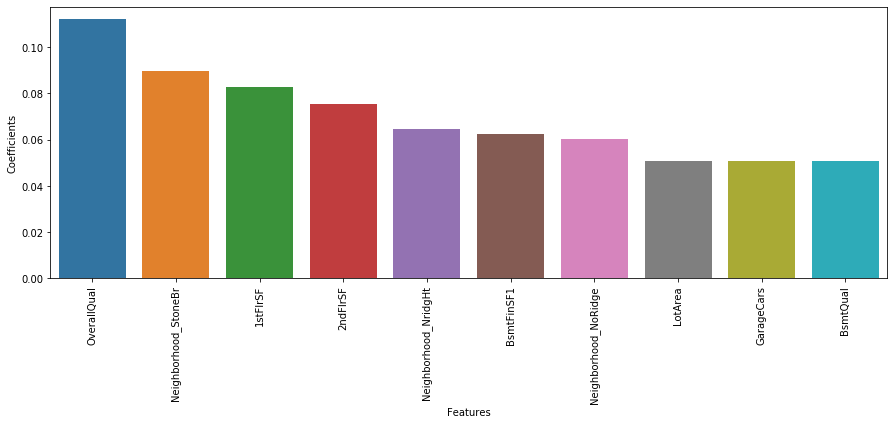

In [149]:
# Displaying top 10 features contributing to predictions of price of house
df_top_15_features = df_top_15_features.sort_values('Coefficients',ascending = False)
df_top_10_features = df_top_15_features.iloc[:10,]
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
sns.barplot(x = df_top_10_features['Features'],y = df_top_10_features['Coefficients'])

In [150]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.882314,0.880762
1,R2 Score (Test),0.864735,0.863717
2,RSS (Train),1.588839,1.609791
3,RSS (Test),0.558238,0.562438
4,MSE (Train),0.039526,0.039785
5,MSE (Test),0.035782,0.035917


From the above table we can see metrics are almost similar between ridge and lasso regression.So Selecting Lasso over Ridge based on the fact that lasso also helps in feature elimination by default(as some coefficients are zero) and also helps in penalising more on data set. Lasso is taken as final model.

# FINAL MODEL

In [151]:
alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('R squared for training set ',r2_score(y_true=y_train,y_pred=y_train_pred))
print('R squared for test set ',r2_score(y_true=y_test,y_pred=y_test_pred))
print("Residual squared Sum of training set ",np.sum(np.square(y_train - y_pred_train)))
print("Residual squared Sum of test set :",np.sum(np.square(y_test - y_pred_test)))
print("Root Mean squared error for training set :",(mean_squared_error(y_train, y_pred_train))**0.5)
print("Root Mean squared error for test set :",(mean_squared_error(y_test, y_pred_test))**0.5)

R squared for training set  0.8807621267341074
R squared for test set  0.8637173030954985
Residual squared Sum of training set  1.6097906960208341
Residual squared Sum of test set : 0.5624379043823187
Root Mean squared error for training set : 0.03978544591935352
Root Mean squared error for test set : 0.035916503080581606


CONCLUSION:
- Optimal lambda for Ridge Regression is : 2.0
- Optimal lambda for Lasso Regression is : 0.0001
- Evaluation metrics are almost similar between ridge and lasso regression.So Selecting Lasso over Ridge based on the fact that lasso also helps in feature elimination by default(as some coefficients are zero) and also helps in penalising more on data set. Lasso is taken as final model.
- Variables important for predictions (from final model which is lasso) are :
    - OverallQual
    - Neighborhood_StoneBr
    - 1stFlrSF
    - 2ndFlrSF
    - Neighborhood_NridgHt
    - BsmtFinSF1
    - Neighborhood_NoRidge
    - LotArea
    - GarageCars
    - BsmtQual

 